<a href="https://colab.research.google.com/github/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/blob/main/Trabalho_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de COVID-19 nos períodos de 2020, 2021 e 2022





# Introdução

Este trabalho tem como objetivo realizar o levantamento de dados reais de COVID-19 nos anos de 2020, 2021 e 2022, para que por meio deste seja possível realizar a extração de informações relevantes sobre os impactos da pandemia em todo país durante esse período.

Por meio disso, utilizou-se dados reais obtidos na plataforma Corona Vírus Brasil (https://covid.saude.gov.br/), veículo oficial de comunicação sobre a situação epidemiológica da COVID-19 no Brasil. Essas informações são obtidas diretamente pelo Ministério da Saúde por meio de dados oficiais repassados pelas Secretarias Estaduais de Saúde das 27 unidades federativas brasileiras.

Como o processo de atualização dos dados é um processo complexo e dinâmico, diariamente estes estão sujeitos a alterações. Além disso, devido a diversidade de cada município brasileiro se tratando de porte populacional, organização de saúde e infraestrutura, é possível que haja erros. Desse modo, a partir dos dados coletados, deve-se primeiramente realizar a limpeza dos dados, para que os mesmos não interfiram no resultado final obtido, ou seja, deve-se organizar os dados, retirar possíveis ruídos, erros e campos nulos. 


## Objetivos gerais

O objetivo do trabalho é aplicar os conceitos aprendidos dentro de sala de aula tanto práticos quanto teóricos, fazendo a manipulação de casos reais, a fim de compreender a complexidade em frente ao ambiente da análise de dados e consequentemente conseguir obter informações importantes a fim de responder os questionamentos levantados pelo grupo.


## Objetivos específicos

- Entender os tipos de atributos e objetos de dados

- Verificar e realizar a limpeza dos dados, eliminando possíveis ruídos, erros ou campos nulos

- Redução da dimensionalidade, eliminando atributos irrelevantes e melhorando a visualização.

- Agregação para combinação de dois ou mais atributos.

- Estratificação para separação em partições (regiões, estados, período de tempo)

- Estatística descritiva com a geração de gráficos e tabelas.






# Manipulação dos dados

## Realizando a importação das bibliotecas necessárias para manipulação dos dados 

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Obtendo os dados que serão estudados

In [88]:
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2021_Parte1_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2021_Parte2_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2022_Parte1_03jun2022.csv

--2022-06-20 20:33:07--  https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62493275 (60M) [text/plain]
Saving to: ‘HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv.1’

HIST_PAINEL_COVIDBR 100%[===================>]  59.60M   269MB/s    in 0.2s    

2022-06-20 20:33:08 (269 MB/s) - ‘HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv.1’ saved [62493275/62493275]

--2022-06-20 20:33:08--  https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv
Resolving raw.githubusercontent.com (raw.githubuserconten

## Armazendo os dados em váriaveis auxiliares, de forma que seja possível estudar os dados nos anos de 2020, 2021 e 2022 durante a pandemia no Brasil.

Vale ressaltar que os anos de 2020 e 2021 estão separados em duas partes diferentes cada um, desse forma é realizada a concatenação dessas partes, visto que será uma análise anual.

In [89]:
covid2020P1 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2020P2 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv",error_bad_lines=False,sep=";")
covid2021P1 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2021_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2021P2 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2021_Parte2_03jun2022.csv",error_bad_lines=False,sep=";")
covid2022 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2022_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2020 = pd.concat([covid2020P1,covid2020P2])
covid2021 = pd.concat([covid2021P1,covid2021P2])



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


# Análise exploratória

A análise exploratória é uma análise preliminar dos dados para entender melhor suas características. Para que por meio disso, seja possível identificar o que precisa ser realizado no pré-processamento, entender quais são as melhores ferramentas para análise e pré-processamento, e por fim aproveitar habilidades humanas para reconhecer padrões.



## Entendendo os atributos e objetos dos dados

In [90]:
covid2020.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

In [91]:
covid2020.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado              int64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

### Atributos:

- **Regiao**:regiões do Brasil
- **Estado**:estados do Brasil
- **Municipio**: Municipio de cada estado
- **coduf**: Códido da UF
- **codmun**: Código municipal
- **codRegiaoSaúde**:Este Código estabelece normas de ordem pública e interesse social para a promoção, defesa e recuperação da saúde.
- **data**: Data atual da inserção dos dados
- **semanaEpi**: Semana epidemiologica
- **casosNovos**:Número de casos novos confirmados por COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde em relação ao dia anterior.
- **casosAcumulados**: Número total de casos confirmados por COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde no período considerado.

- **obitosNovos**:Número de óbitos novos confirmados por COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde em relação ao dia anterior.

- **obitosAcumulado**:Número total de óbitos confirmados por COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde no período considerado.

- **populacaoTCU2019**: Estimativas de 2019 utilizadas pelo TCU para determinação das cotas do FPM (sem sexo e faixa etária). 


# Primeiras 10 linhas dos dados de COVID-19 em 2020
A seguir, é possível fazer a visualização dos dados de COVID-19 por meio de tabelas, dessa forma é possível visualizar seus atributos e seus respectivos valores.


In [92]:
covid2020.head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,1.0,1.0,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125.0,2,0,0,0,1.0,1.0,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-02,10,210147125.0,2,0,0,0,0.0,2.0,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-03,10,210147125.0,2,0,0,0,0.0,2.0,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-04,10,210147125.0,3,1,0,0,1.0,2.0,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-05,10,210147125.0,7,4,0,0,4.0,3.0,NaN


Por meio da tabela acima é possível visualizar a existência de muitos valores nulos. Além disso, pode-se observa que no atributo região aparece o valor *Brasil*. Dessa forma, será necessário realizar a limpeza dos dados e o reagrupamento das informações, como por exemplo separando a região *Brasil* das outras regiões.

In [93]:
covid2020['regiao'].unique()

array(['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

# Limpeza dos Dados

A limpeza dos dados é essencial para que consigamos obter uma melhor visualização dos dados, fazendo com que possamos eliminar atributos irrelevantes, como ruídos, erros ou valores nulos. A fim de reduzir o tempo de processamento e memória.


## Separação da região Brasil

A seguir será realizando a separação dos dados referente a região *Brasil* em relação às outras regiões do Brasil. Visto que Brasil se refere a todo o pais e não somente a uma região como por exemplo sul, norte e nordeste.

In [94]:
DadosBrasil2020 = covid2020[covid2020['regiao'] == 'Brasil']
DadosBrasil2021 = covid2021[covid2021['regiao'] == "Brasil"]
DadosBrasil2022 = covid2022[covid2022['regiao'] == 'Brasil']

## Renomeando a coluna *regiao* para *pais*

In [95]:
#mudando a coluna do nome região para pais, já que só teremos os dados do Brasil
DadosBrasil2020.rename(columns = {'regiao':'pais'}, inplace = True)
DadosBrasil2021.rename(columns = {'regiao':'pais'}, inplace = True)
DadosBrasil2022.rename(columns = {'regiao':'pais'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
DadosBrasil2022

,pais,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0,NaN
150,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0,NaN
151,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0,NaN
152,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0,NaN


## Eliminando colunas nulas

Agora iremos eliminar as colunas "estado","municipio","codmun","codRegiaoSaude","nomeRegiaoSaude","interior/metropolitana", visto que essas são colunas nulas. 

In [97]:
for i in ["estado","municipio","codmun","codRegiaoSaude","nomeRegiaoSaude","interior/metropolitana"]:
  DadosBrasil2020 = DadosBrasil2020.drop(columns=[i])
  DadosBrasil2021 = DadosBrasil2021.drop(columns=[i])
  DadosBrasil2022 = DadosBrasil2022.drop(columns=[i])

## Visualização da retirada dos valores nulos

Desse forma, facilitamos a visualizar dos dados relevantes, a partir da retirada das colunas nulas. Além disso, melhorando o tempo de processamento e mémoria.

In [98]:
DadosBrasil2022

,pais,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,76,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0
1,Brasil,76,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0
2,Brasil,76,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0
3,Brasil,76,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0
4,Brasil,76,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0
...,...,...,...,...,...,...,...,...,...,...,...
149,Brasil,76,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0
150,Brasil,76,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0
151,Brasil,76,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0
152,Brasil,76,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0


## Retirada de uma coluna não nula

Nos dataframes do Brasil é possível perceber que a coluna 'coduf' não é nula, mas retorna o mesmo valor, que não serão necessário na análise, desse modo, pode-se retirar essa coluna do dataframe.

In [99]:
print(DadosBrasil2020['coduf'],DadosBrasil2021['coduf'], DadosBrasil2022['coduf'])


0      76
1      76
2      76
3      76
4      76
       ..
148    76
149    76
150    76
151    76
152    76
Name: coduf, Length: 311, dtype: int64 0      76
1      76
2      76
3      76
4      76
       ..
179    76
180    76
181    76
182    76
183    76
Name: coduf, Length: 365, dtype: int64 0      76
1      76
2      76
3      76
4      76
       ..
149    76
150    76
151    76
152    76
153    76
Name: coduf, Length: 154, dtype: int64


Então a coluna 'coduf' será removida dos dataframes

In [100]:
DadosBrasil2020 = DadosBrasil2020.drop(columns=['coduf'])
DadosBrasil2021 = DadosBrasil2021.drop(columns=['coduf'])
DadosBrasil2022 = DadosBrasil2022.drop(columns=['coduf'])

# Resultado obtido a partir da limpeza dos dados (Brasil)

In [101]:
DadosBrasil2022

,pais,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0
1,Brasil,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0
2,Brasil,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0
3,Brasil,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0
4,Brasil,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0
...,...,...,...,...,...,...,...,...,...,...
149,Brasil,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0
150,Brasil,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0
151,Brasil,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0
152,Brasil,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0


# Selecionando os dados das regiões do Brasil nos anos de 2020, 2021 e 2022.

Regiões sul, norte, nordeste, sudeste e centro-oeste.

In [102]:
RegioesBrasil2020 = covid2020[covid2020['regiao'] != 'Brasil']
RegioesBrasil2021 = covid2021[covid2021['regiao'] != 'Brasil']
RegioesBrasil2022 = covid2022[covid2022['regiao'] != 'Brasil']

# Regiões do Brasil em 2020

In [103]:
RegioesBrasil2020

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
158,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN
159,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN
160,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN
161,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN,NaN,NaN
162,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859702,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,NaN,NaN,1.0
859703,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,NaN,NaN,1.0
859704,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,NaN,NaN,1.0
859705,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,NaN,NaN,1.0


# Regiões do Brasil em 2021

In [104]:
RegioesBrasil2021

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
181,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-01,53,1777225.0,95999.0,270,1822,5,NaN,NaN,NaN
182,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-02,53,1777225.0,96433.0,434,1825,3,NaN,NaN,NaN
183,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-03,1,1777225.0,96906.0,473,1832,7,NaN,NaN,NaN
184,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-04,1,1777225.0,97197.0,291,1840,8,NaN,NaN,NaN
185,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-05,1,1777225.0,97854.0,657,1852,12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033891,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-27,52,3015268.0,519103.0,225,11100,5,NaN,NaN,1.0
1033892,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-28,52,3015268.0,519196.0,93,11104,4,NaN,NaN,1.0
1033893,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-29,52,3015268.0,519346.0,150,11105,1,NaN,NaN,1.0
1033894,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-30,52,3015268.0,519546.0,200,11107,2,NaN,NaN,1.0


# Regiões do Brasil em 2022

In [105]:
RegioesBrasil2022

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
154,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-01,52,1777225.0,284660.0,34,6737,3,NaN,NaN,NaN
155,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-02,1,1777225.0,284692.0,32,6739,2,NaN,NaN,NaN
156,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-03,1,1777225.0,284783.0,91,6742,3,NaN,NaN,NaN
157,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-04,1,1777225.0,285037.0,254,6745,3,NaN,NaN,NaN
158,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-05,1,1777225.0,285269.0,232,6748,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-30,22,3015268.0,708552.0,2604,11691,1,NaN,NaN,1.0
865322,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-31,22,3015268.0,710694.0,2142,11691,0,NaN,NaN,1.0
865323,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-01,22,3015268.0,712968.0,2274,11692,1,NaN,NaN,1.0
865324,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-02,22,3015268.0,715938.0,2970,11692,0,NaN,NaN,1.0


## Contagem dos pacientes recuperados da COVID-19

In [106]:
#Verificando se existem algum valor não nulo na coluna recuperadosnovos dos dataframes de regiões
value1 = RegioesBrasil2022['Recuperadosnovos'].count()
value2 = RegioesBrasil2021['Recuperadosnovos'].count()
value3 = RegioesBrasil2020['Recuperadosnovos'].count()
print("RecuperadosNovaos:",value1, value2, value3)

value1 = RegioesBrasil2022['emAcompanhamentoNovos'].count()
value2 = RegioesBrasil2021['emAcompanhamentoNovos'].count()
value3 = RegioesBrasil2020['emAcompanhamentoNovos'].count()
print("emAcompanhamentoNovos:",value1, value2, value3)


RecuperadosNovaos: 0 0 0
emAcompanhamentoNovos: 0 0 0


Apagando as colunas nulas dos dataframes de regiões

In [107]:
#Colunas nulas deletadas
for i in ['Recuperadosnovos','emAcompanhamentoNovos']:

  RegioesBrasil2022 = RegioesBrasil2022.drop(columns=[i])
  RegioesBrasil2021 = RegioesBrasil2021.drop(columns=[i])
  RegioesBrasil2020 = RegioesBrasil2020.drop(columns=[i])


In [108]:
RegioesBrasil2020

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
158,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN
159,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN
160,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN
161,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN
162,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859702,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,1.0
859703,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,1.0
859704,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,1.0
859705,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,1.0


# Concatenação dos bancos de dados dos anos 2020,2021,2022 para a visualização mais abrangente acerca dos casos novos no decorrer dos anos

In [109]:
# Variáveis a serem usadas
# DadosBrasil2020 -> 21, 22
# RegioesBrasil2020 -> 21, 22

RegioesBrasilFull = pd.concat([RegioesBrasil2020,RegioesBrasil2021,RegioesBrasil2022])

In [110]:
RegioesBrasilFull['regiao'].unique()

array(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [111]:
# Definição de algumas cores para graficos
regioes_colors = {
    'Norte': '#FAA916',
    'Nordeste': '#0FA3B1',
    'Sudeste': '#BB4430',
    'Sul': '#FFCBDB',
    'Centro-Oeste': '#7D5B8C'
}

#Gráfico que mostra o número de casos novos no decorrer dos anos

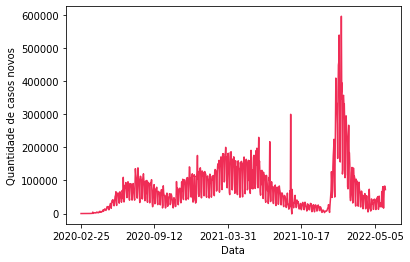

In [112]:
group_date = RegioesBrasilFull.groupby("data")
group_date.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('Quantidade de casos novos')
plt.xlabel('Data')
plt.show()

# Visualizando a população dos estados para tentar ver alguma correlação

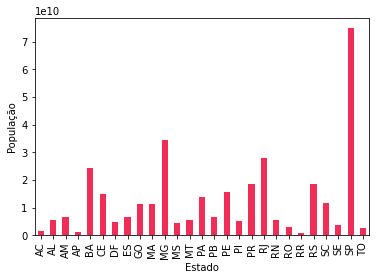

In [113]:
GroupState = RegioesBrasilFull.groupby('estado')
GroupState.sum()['populacaoTCU2019'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('População')
plt.show()

# Criando uma nova coluna para mostrar a proporção entre o número de casos novos e o tamanho da população para cada estado

In [114]:
df = RegioesBrasilFull
df['Prop'] = df['casosNovos'] / df['populacaoTCU2019']

# Gráfico que mostra a relação entre o número de casos novos e a população do estado

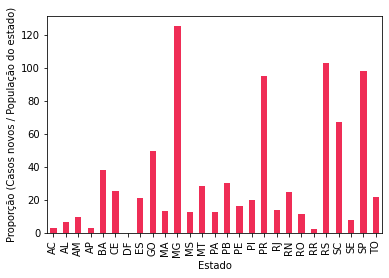

In [115]:
GroupState = df.groupby('estado')
GroupState.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado)')
plt.show()

### O gráfico acima revela como ocorre reíncidencia ou aparecimento de novos casos de covid19 em cada estado de acordo com sua população durante os anos de 2020,2021 e 2022

# Gráfico para visualização da relação feita anteriormente para cada ano separadamente

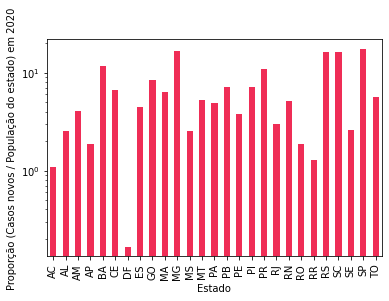

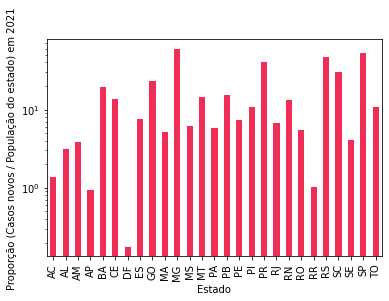

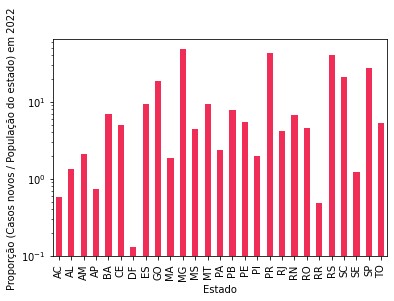

In [116]:
df1 = RegioesBrasil2020
df2 = RegioesBrasil2021
df3 = RegioesBrasil2022

df1['Prop'] = df1['casosNovos'] / df1['populacaoTCU2019']
df2['Prop'] = df2['casosNovos'] / df2['populacaoTCU2019']
df3['Prop'] = df3['casosNovos'] / df3['populacaoTCU2019']


GroupState1 = df1.groupby('estado')
GroupState1.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado) em 2020')
plt.yscale('log')
plt.show()

print(end=" ")

GroupState2 = df2.groupby('estado')
GroupState2.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado) em 2021')
plt.yscale('log')
plt.show()

print(end=" ")


GroupState3 = df3.groupby('estado')
GroupState3.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado) em 2022')
plt.yscale('log')
plt.show()


# Questionamentos levantados pelo grupo

# 1 - Qual a média de casos novos de Covid em cada região nos anos de 2020, 2021 e 2022 ?


### Em 2020

MÉDIA DE CASOS NOVOS EM 2020
regiao
Centro-Oeste    13.182418
Nordeste         7.470494
Norte           13.318400
Sudeste         11.453187
Sul              8.106254
Name: casosNovos, dtype: float64


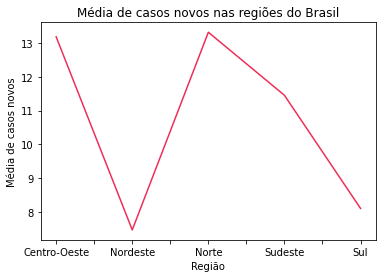

In [117]:
df_covid2020 = RegioesBrasil2020.groupby('regiao')
mediaCasosNovos2020 = df_covid2020['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2020")
print(mediaCasosNovos2020)
print("="*30)

df_covid2020.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()


### Em 2021

MÉDIA DE CASOS NOVOS EM 2021
regiao
Centro-Oeste    17.701237
Nordeste         9.235051
Norte           12.683276
Sudeste         19.533468
Sul             13.687786
Name: casosNovos, dtype: float64


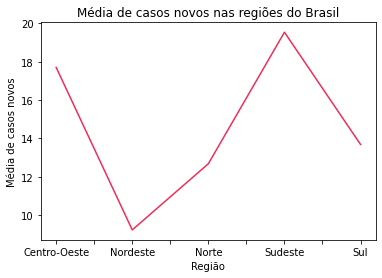

In [118]:
df_covid2021 = RegioesBrasil2021.groupby('regiao')
mediaCasosNovos2021 = df_covid2021['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2021")
print(mediaCasosNovos2021)
print("="*30)

df_covid2021.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()


### Em 2022

MÉDIA DE CASOS NOVOS EM 2022
regiao
Centro-Oeste    26.616238
Nordeste         9.554292
Norte           16.576934
Sudeste         27.620882
Sul             25.993881
Name: casosNovos, dtype: float64


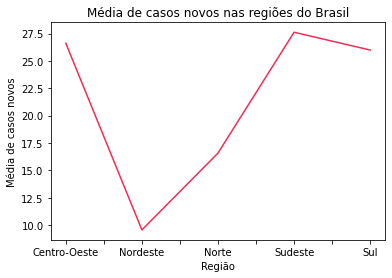

In [119]:
df_covid2022 = RegioesBrasil2022.groupby('regiao')
mediaCasosNovos2022 = df_covid2022['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2022")
print(mediaCasosNovos2022)
print("="*30)

df_covid2022.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()

# 2 - Qual o número de casos novos de Covid em cada região nos anos de  2020, 2021 e 2022 ?

### 2020

QUANTIDADE DE CASOS NOVOS EM 2020
regiao
Centro-Oeste    1747514
Nordeste        3792314
Norte           1718300
Sudeste         5376172
Sul             2717646
Name: casosNovos, dtype: int64


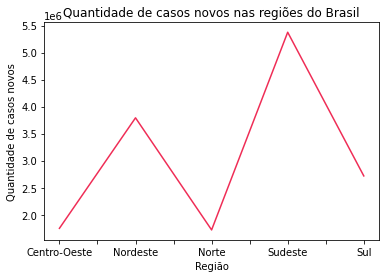

In [120]:
df_covid2020 = RegioesBrasil2020.groupby('regiao')
casosNovos2020 = df_covid2020['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2020")
print(casosNovos2020)
print("="*30)

df_covid2020.sum()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Quantidade de casos novos')
plt.title("Quantidade de casos novos nas regiões do Brasil")
plt.show()

### 2021

QUANTIDADE DE CASOS NOVOS EM 2021
regiao
Centro-Oeste     3056030
Nordeste         6107878
Norte            2129522
Sudeste         11949404
Sul              5980262
Name: casosNovos, dtype: int64


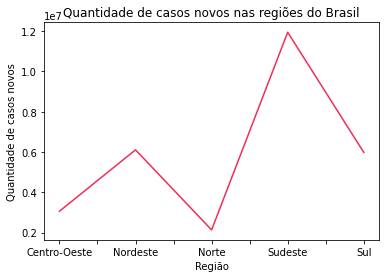

In [121]:
df_covid2021 = RegioesBrasil2021.groupby('regiao')
casosNovos2021 = df_covid2021['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2021")
print(casosNovos2021)
print("="*30)

df_covid2021.sum()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Quantidade de casos novos')
plt.title("Quantidade de casos novos nas regiões do Brasil")
plt.show()


### 2022

QUANTIDADE DE CASOS NOVOS EM 2022
regiao
Centro-Oeste    1938780
Nordeste        2666106
Norte           1174310
Sudeste         7129060
Sul             4791660
Name: casosNovos, dtype: int64


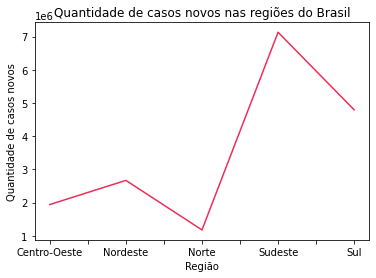

In [122]:
df_covid2022 = RegioesBrasil2022.groupby('regiao')
casosNovos2022 = df_covid2022['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2022")
print(casosNovos2022)
print("="*30)

df_covid2022.sum()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Quantidade de casos novos')
plt.title("Quantidade de casos novos nas regiões do Brasil")
plt.show()

#3 - Óbitos de covid durante o ano de 2022?

In [123]:
DadosBrasil2022['obitosNovos'].sum()

47915

#4 - Quais as regiões mais afetadas pela Covid-19?

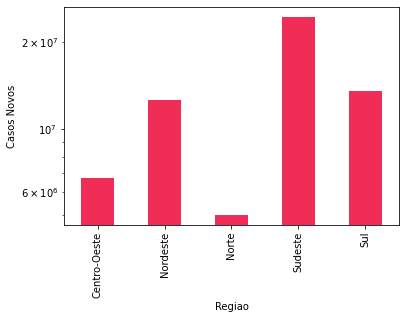

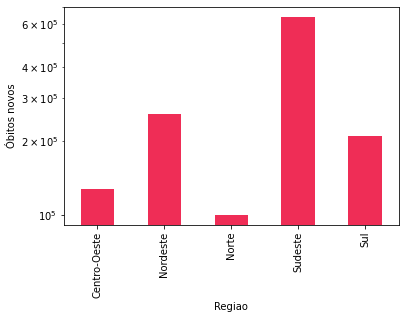

In [124]:
# Pegando o gráfico para analisar os casos novos em cada região
GroupState1 = RegioesBrasilFull.groupby('regiao')
GroupState1.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Regiao')
plt.ylabel('Casos Novos')
plt.yscale('log')
plt.show()
# Pegando o gráfico para analisar os óbitos novos em cada região
print('\n')
GroupState1 = RegioesBrasilFull.groupby('regiao')
GroupState1.sum()['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Regiao')
plt.ylabel('Óbitos novos')
plt.yscale('log')
plt.show()

##Por meio desses dois gráficos que analisam os óbitos novos e os casos novos de covid19, podemos observar que as regiões mais afetadas pela covid são as regiões Nordeste,Sudeste e sul respectivamente.

#5 -  Qual o ano mais afetado pela Covid 19 ?

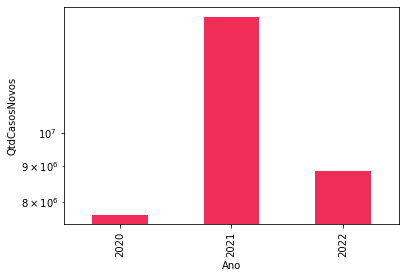

In [125]:
data = pd.DataFrame(columns = ['Ano' , 'QtdCasosNovos'])
data.loc[0] = ['2020',DadosBrasil2020['casosNovos'].sum()]
data.loc[1] = ['2021',DadosBrasil2021['casosNovos'].sum()]
data.loc[2] = ['2022',DadosBrasil2022['casosNovos'].sum()]

GroupState1 = data.groupby('Ano')
GroupState1.sum()['QtdCasosNovos'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Ano')
plt.ylabel('QtdCasosNovos')
plt.yscale('log')
plt.show()

## Por meio desse gráfico, podemos notar que o ano mais afetado com novos casos de covid19 é o ano de 2021 com maior número de aparecimento de novos casos dentre os 3 anos

#6 - Qual a probabilidade de ocorrer um caso em Minas Gerais ?

In [126]:
#Considerando todos os anos e voltando apenas para o estado de Minas Gerais, temos que a probabilidade de ocorrer um caso novo, seja uma relação entre os casos novos e o número de pessoas no estado de minas
# População estimada em Minas Gerais = 21.411.923 no ano de 2021

Minas = RegioesBrasilFull[RegioesBrasilFull['estado'] == 'MG']['casosNovos'].sum()
print(f'A probabilidade é de {(Minas/21411923)*100}%')

A probabilidade é de 32.089607271612174%


#7 - Qual a probabilidade de ocorrer um novo caso de Covid-19 em 2022 ?

In [127]:
#Estimativa da população brasileira em 2022  == 216 577 254

Dados = DadosBrasil2022['casosNovos'].sum()
print(f'A probabilidade é de {(Dados/216577254)*100}%')

A probabilidade é de 4.086282301833968%


#8 - Quais as regiões menos afetadas pela Covid nos anos de 2020, 2021 e 2022 ?

Para descobrir qual região foi mais afetada pelo covid, primeiro plotamos um gráfico para visualizar as regiões que mais tiveram casos novos

Visualizando o gráfico abaixo é possível perceber que as regiões menos afetadas foram as regiões Centro-Oeste, Norte e Sul.

Quantidade de casos novos no dataframe de 2020


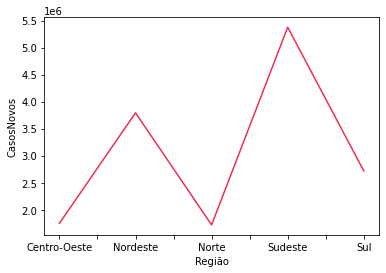

In [128]:
casosNovos2020  = RegioesBrasil2020.groupby('regiao')
casosNovos2020.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2020")
plt.show()

Veja abaixo a quantidade de casos novos em cada região, isto agrupando as regiões e somando a quantidade de casos novos. Nele é ratificado as informações do gráfico, onde demonstra ratificar a confirmação anterior que as regiões Centro-Oeste e Norte são as regiões que menor tiveram casos novos de covid. Veja os dados em ordem crescente abaixo.

In [129]:
casosNovos2020  = RegioesBrasil2020.groupby('regiao')
casosNovos2020['casosNovos'].sum().sort_values()

regiao
Norte           1718300
Centro-Oeste    1747514
Sul             2717646
Nordeste        3792314
Sudeste         5376172
Name: casosNovos, dtype: int64

Veja agora no ano de 2021 quais foram as regiões que mais tiveram novos casos de covid, e com isto foram mais afetadas.

Quantidade de casos novos no dataframe de 2021


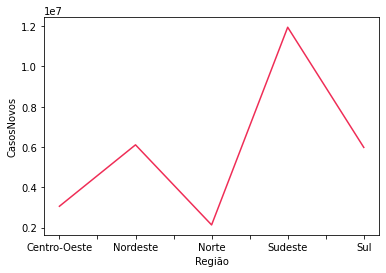

In [130]:
casosNovos2021  = RegioesBrasil2021.groupby('regiao')
casosNovos2021.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()

No gráfico e somando os casos novos de covid é possível ver que as regiões menos afetadas nos anos de 2021 foram as regiões do Norte e Centro-Oeste novamente. Veja os dados em ordem crescente abaixo.

In [131]:
casosNovos2021  = RegioesBrasil2021.groupby('regiao')
casosNovos2021['casosNovos'].sum().sort_values()

regiao
Norte            2129522
Centro-Oeste     3056030
Sul              5980262
Nordeste         6107878
Sudeste         11949404
Name: casosNovos, dtype: int64

Agora iremos verificar quais regiões no ano de 2022 foram mais afetadas pelo covid.

Quantidade de casos novos no dataframe de 2022


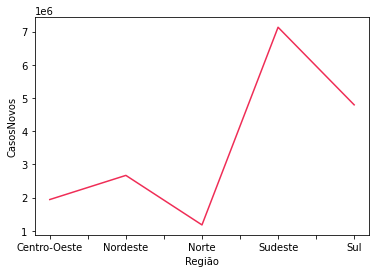

In [132]:
casosNovos2022  = RegioesBrasil2022.groupby('regiao')
casosNovos2022.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2022")
plt.show()

Novamente o Centro-Oeste e o Norte tiveram meno casos de covid, veja abaixo a soma dos novos casos.

In [133]:
casosNovos2022  = RegioesBrasil2022.groupby('regiao')
casosNovos2022['casosNovos'].sum().sort_values()

regiao
Norte           1174310
Centro-Oeste    1938780
Nordeste        2666106
Sul             4791660
Sudeste         7129060
Name: casosNovos, dtype: int64

Veja agora o dataframe, cujo os dados são a concatenação dos dataframes de 2020, 2021 e 2022. Nele veremos quais regiões foram mais afetadas nos 3 anos. Veja os dados em ordem crescente abaixo.

In [134]:
df = RegioesBrasilFull.groupby('regiao')
df['casosNovos'].sum().sort_values()

regiao
Norte            5022132
Centro-Oeste     6742324
Nordeste        12566298
Sul             13489568
Sudeste         24454636
Name: casosNovos, dtype: int64

#9 - Qual o estado teve o maior número de casos em 2022 ?

In [135]:
RegioesBrasil2022

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana,Prop
154,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-01,52,1777225.0,284660.0,34,6737,3,NaN,0.000019
155,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-02,1,1777225.0,284692.0,32,6739,2,NaN,0.000018
156,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-03,1,1777225.0,284783.0,91,6742,3,NaN,0.000051
157,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-04,1,1777225.0,285037.0,254,6745,3,NaN,0.000143
158,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-05,1,1777225.0,285269.0,232,6748,3,NaN,0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-30,22,3015268.0,708552.0,2604,11691,1,1.0,0.000864
865322,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-31,22,3015268.0,710694.0,2142,11691,0,1.0,0.000710
865323,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-01,22,3015268.0,712968.0,2274,11692,1,1.0,0.000754
865324,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-02,22,3015268.0,715938.0,2970,11692,0,1.0,0.000985


In [136]:
estadosAgrupados = RegioesBrasil2022.groupby('estado')
estadosOrdenados = estadosAgrupados['casosNovos'].sum().sort_values()
estadosOrdenados

estado
RR      53510
AP      66924
PI      67316
AC      73454
SE      97974
AL     114698
MA     136732
TO     142926
RO     239734
RN     240142
PB     282762
AM     298044
PA     299718
MS     310690
MT     360150
DF     396862
BA     558014
CE     580612
PE     587856
ES     852016
GO     871078
SC    1009636
RJ    1710776
RS    1889352
PR    1892672
SP    2143236
MG    2423032
Name: casosNovos, dtype: int64

Quantidade de casos novos no dataframe de 2022


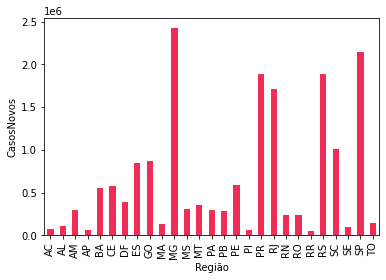

In [137]:
estadosAgrupados = RegioesBrasil2022.groupby('estado')
estadosAgrupados.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2022")
plt.show()

Verificando os dados depois de ordenados, isto em ordem crescente, e verificando o gráfico de barras acima, o estado que teve a maior taxa de covid foi o estado de Minas Gerais.

# 10 - Qual o estado teve o menor número de casos em 2021 ?

Para sabermos qual foi o estado que menor teve casos de covid no anos de 2021, iremos primeiro agrupar o dataframe por estado e ordená-lo verificando qual estado teve menor número de casos em 2021

In [138]:
estadosOrdenados = RegioesBrasil2021.groupby('estado')
estadosOrdenados = estadosOrdenados['casosNovos'].sum().sort_values()
estadosOrdenados

estado
AC      93528
AP     117560
RR     120794
AL     274524
TO     290400
SE     332050
MA     339414
RO     377794
PI     383536
AM     465600
MS     493288
DF     536220
RN     538238
PB     595702
PA     663846
MT     748850
ES     763278
PE     847030
CE    1242468
GO    1277672
SC    1501904
BA    1554916
RJ    1836352
RS    2114886
PR    2363472
MG    3362152
SP    5987622
Name: casosNovos, dtype: int64

Acima é possível ver em ordem crescente que o estado que teve o menor número de casos em 2021 foi o estado do Acré, agora plotaremos um gráfico de barras para ver esta diferença com os outros estados. Veja abaixo:

Quantidade de casos novos no dataframe de 2021


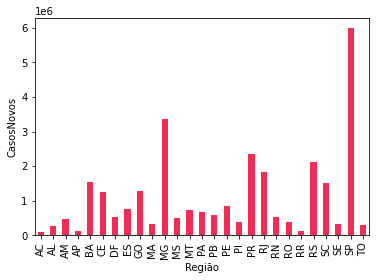

In [139]:
estadosAgrupados = RegioesBrasil2021.groupby('estado')
estadosAgrupados.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()

#11 - Qual a região teve mais sucesso no combate ao Covid, nos anos de 2020, 2021 2 2022 ?

Para desconbrir qual região teve mais sucesso ao combate ao covid primeiro vamos verficar quais regiões menos tiveram casos de covid, e verificar as regiões que tiveram menos morte.

In [140]:
#Agrupando as regiões e verificando quais delas tiveram menos casos, vamos usar o dataframe que contenham todos os dados de 2020, 2021 e 2022
regioesOrdenadas = RegioesBrasilFull.groupby('regiao')
regioesOrdenadas['casosNovos'].sum().sort_values()

regiao
Norte            5022132
Centro-Oeste     6742324
Nordeste        12566298
Sul             13489568
Sudeste         24454636
Name: casosNovos, dtype: int64

Nos anos de 2020 a 2022 a região norte teve menos casos novos de covid, ou seja, foi a região que menos teve casos. Veja no gráfico abaixo esta descrepância:

Quantidade de casos novos no dataframe de 2021


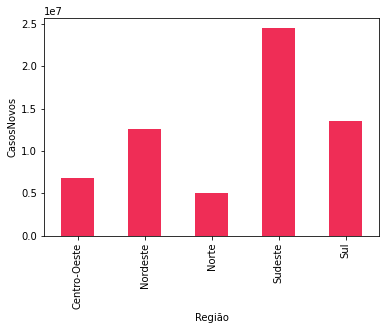

In [141]:
regioesOrdenadas.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()


Logo, é possível afirmar apenas vendo o gráfico de barras que a região norte foi a menos afetada.

Agora iremos verificar qual região teve menos casos de óbitos

In [142]:
regioesOrdenadas['obitosNovos'].sum().sort_values()

regiao
Norte           100440
Centro-Oeste    127122
Sul             209638
Nordeste        258260
Sudeste         638482
Name: obitosNovos, dtype: int64

A região que menos teve casos de óbitos foi o Norte. Veja no gráfico abaixo esta descrepância com os outros estados.

Quantidade de casos novos no dataframe de 2021


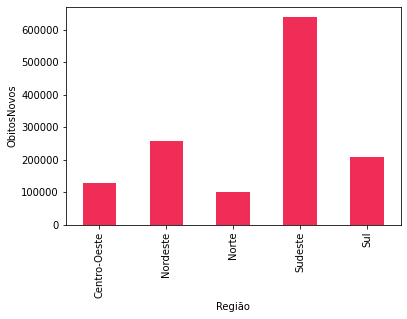

In [143]:
regioesOrdenadas.sum()['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('ObitosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()


Diante disso, analisando os anos de 2020, 2021 e 2022 a região que conteve mais o covid foi o Norte, pois foi o estado com menos casos e menas morte.

# 12 - Qual a região que teve mais óbitos com a Covid ?

A região que teve mais óbito de covid foi a região Sudeste. Veja no gráfico abaixo:

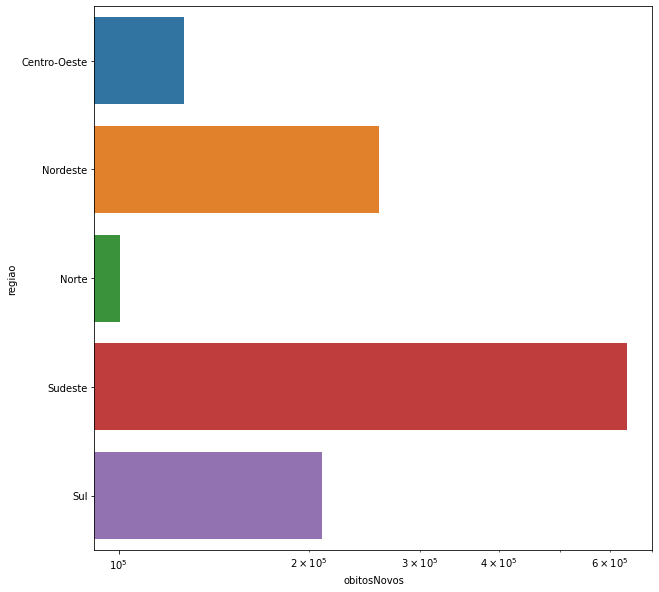

In [144]:
country_group_sum = RegioesBrasilFull.groupby('regiao').sum().reset_index()
plt.figure(figsize=(10,10))

g=sns.barplot(data=country_group_sum, y='regiao', x='obitosNovos', orient='h')
g.set_xscale('log')

plt.show()

# 13 - Qual o impacto das vacinas com o número de óbitos de Covid-19?

## Primeiramente iremos analisar o número de óbitos em cada ano:

### 2020

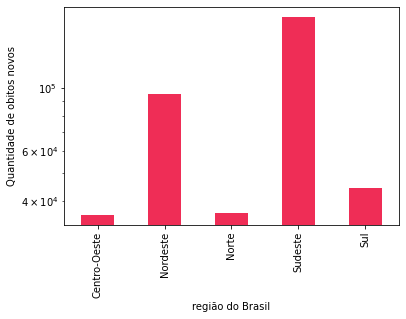

In [172]:
group_date = RegioesBrasil2020.groupby("regiao")
group_date.sum()['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('Quantidade de obitos novos')
plt.xlabel('região do Brasil')
plt.yscale('log')
plt.show()



### 2021

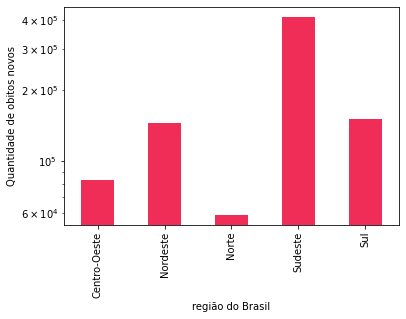

In [171]:
group_date = RegioesBrasil2021.groupby("regiao")
group_date.sum()['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('Quantidade de obitos novos')
plt.xlabel('região do Brasil')
plt.yscale('log')
plt.show()

### 2022

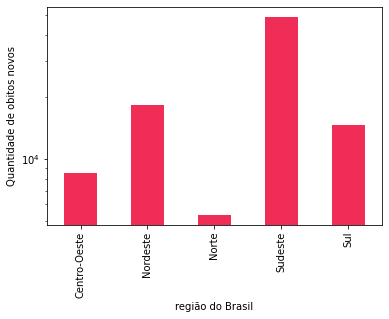

In [170]:
group_date = RegioesBrasil2022.groupby("regiao")
group_date.sum()['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('Quantidade de obitos novos')
plt.xlabel('região do Brasil')
plt.yscale('log')
plt.show()

### A partir dos gráficos acima é possível perceber uma baixa consideravel em relação aos anos de 2020 e 2021 em relação com o ano de 2022. Desse modo, pode-se dizer que provavelmente a vacina para o combate do corona vírus teve um impacto positivo em relação ao números de óbitos registrados.

# 14 - Qual o número de casos de COVID-19 no decorrer dos anos?

In [181]:
CasosNovos2020 = RegioesBrasil2020['casosNovos'].count()
print("Número de casos de COVID-19 em 2020")
print(CasosNovos2020)
print("="*30)

CasosNovos2021 = RegioesBrasil2021['casosNovos'].count()
print("Número de casos de COVID-19 em 2021")
print(CasosNovos2021)
print("="*30)

CasosNovos2022 = RegioesBrasil2022['casosNovos'].count()
print("Número de casos de COVID-19 em 2022")
print(CasosNovos2022)
print("="*30)

port2020to2021 = (CasosNovos2021 * 100) /CasosNovos2020
port2021to2022 = (CasosNovos2022 * 100) /CasosNovos2021
print("="*100)
print(f"O aumento em porcentagem do número de casos novos de 2020 a 2021: {port2020to2021 - 100}%")
print(f"O aumento em porcentagem do número de casos novos de 2021 a 2022: {port2021to2022 - 100}%")
print("="*100)

Número de casos de COVID-19 em 2020
1573877
Número de casos de COVID-19 em 2021
2050570
Número de casos de COVID-19 em 2022
865172
O aumento em porcentagem do número de casos novos de 2020 a 2021: 30.28781791715616%
O aumento em porcentagem do número de casos novos de 2021 a 2022: -57.80821917808219%


## Pode-se notar que houve uma aumento do numero de casos novos em relação aos nos de 2020 e 2021 e uma redução no número de casos registrado no período de 2021 a 2020.

# 15 - Qual é a distribuição de casos novos ao decorrer do tempo em Minas Gerais no ano de 2020?

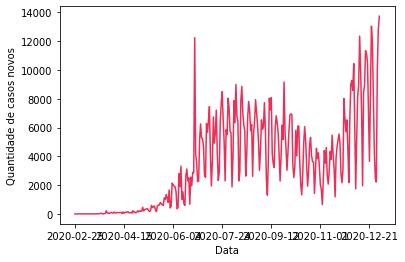

In [193]:
minas = RegioesBrasil2020[RegioesBrasil2020['estado'] == 'MG']

group_date = minas.groupby("data")
group_date.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('Quantidade de casos novos')
plt.xlabel('Data')
plt.show()

## Podemos observar que houve um aumento no número de casos novos registrado em Minas Gerais com o passar do tempo da pandemia.Havendo uma crescente no final do ano.

# 16 - Analise os óbitos diários por covid nos anos de 2020, 2021 e 2022.
Para fazer uma análise dos óbitos diários por covid nos anos de 2020, 2021 e 2022 será utilizado o boxplot.


## Boxplot dos óbitos em 2020

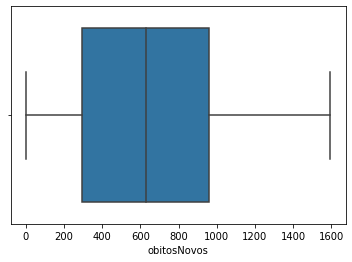

In [145]:
sns.boxplot(x=DadosBrasil2020['obitosNovos']) 
plt.show()

## Boxplot dos óbitos em 2021

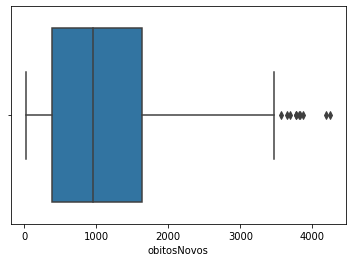

In [146]:
sns.boxplot(x=DadosBrasil2021['obitosNovos']) 
plt.show()

## Boxplot dos óbitos em 2022

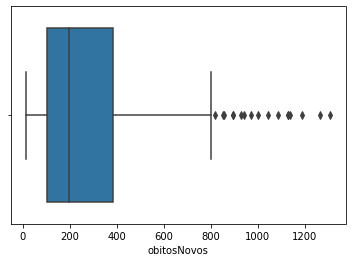

In [147]:
sns.boxplot(x=DadosBrasil2022['obitosNovos']) 
plt.show()

Através dos boxplots criados foi possível perceber que as mortes diárias se elevaram de 2020 para 2021 e diminuíram de 2021 para 2022. Isso ficou perceptível através do maior número de óbito e o 3º quartil de cada ano, sendo que:

*   Em 2020 o maior óbito diário ficou por volta dos 1.600 e o 3º quartil por volta de 970.
*   Em 2021 o maior óbito diário ficou por volta dos 3.500 e o 3º quartil por volta de 1600.
* Em 2020 o maior óbito diário ficou por volta dos 800 e o 3º quartil por volta de 390.

Vale lembrar que foi desconsiderado os outliers na análise realizada.



# 17 - Identifique os quartis de cada boxplot gerado na questão 11.

In [148]:
# Ano de 2020
display(np.percentile(DadosBrasil2020['obitosNovos'],25))
display(np.percentile(DadosBrasil2020['obitosNovos'],50))
display(np.percentile(DadosBrasil2020['obitosNovos'],75))
print()
# Ano de 2021
display(np.percentile(DadosBrasil2021['obitosNovos'],25))
display(np.percentile(DadosBrasil2021['obitosNovos'],50))
display(np.percentile(DadosBrasil2021['obitosNovos'],75))
print()
# Ano de 2022
display(np.percentile(DadosBrasil2022['obitosNovos'],25))
display(np.percentile(DadosBrasil2022['obitosNovos'],50))
display(np.percentile(DadosBrasil2022['obitosNovos'],75))

293.0

627.0

957.0

389.0

962.0

1641.0

103.0

195.0

385.0

Quartis de óbitos diários de 2020:
* **1º quartil:** 293
* **2º quartil:** 627
* **3º quartil:** 957

Quartis de óbitos diários de 2021:
* **1º quartil:** 389
* **2º quartil:** 962
* **3º quartil:** 1641

Quartis de óbitos diários de 2022:
* **1º quartil:** 103
* **2º quartil:** 195
* **3º quartil:** 385

Estes dados contribuem na confirmação da afirmação realizada na questão anterior.

# 18 - Os óbitos por covid ocorreram mais em regiões do interior ou em regiões metropolitanas ?
Para responder a esta pergunta será utilizado um gráfico de pizza, onde cidade interior é representada por 0 e cidade metropolitana por 1.

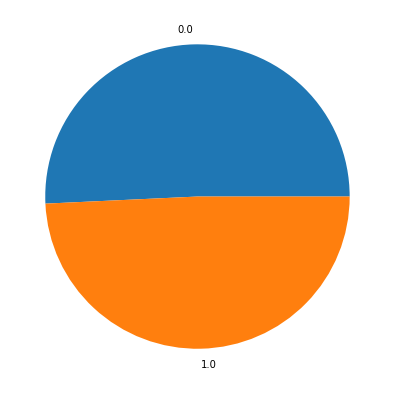

In [149]:
filtro = RegioesBrasilFull.groupby('interior/metropolitana').sum()
fig=plt.figure(figsize=(10,7))
plt.pie(labels=filtro.index,x=filtro['obitosNovos'])
plt.show()

Observando o gráfico de pizza acima podemos concluir que os óbitos são maiores em regiões do interior, no entanto, a porcentagem de óbitos para cada tipo de região está bem próxima.

# 19 - Como ocorreu os óbitos por covid na região sudeste nos anos de 2020, 2021, 2022?
Para responder a esta pergunta usaremos gráfico de barras para cada ano.

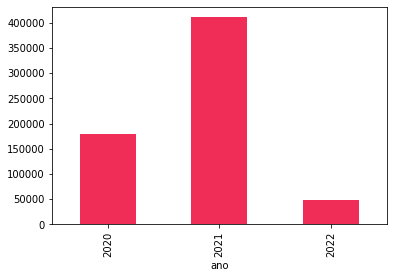

In [150]:
sudeste2020=RegioesBrasil2020.groupby('regiao').sum().reset_index()
sudeste2020=sudeste2020.assign(ano="2020")
sudeste2021=RegioesBrasil2021.groupby('regiao').sum().reset_index()
sudeste2021=sudeste2021.assign(ano="2021")
sudeste2022=RegioesBrasil2022.groupby('regiao').sum().reset_index()
sudeste2022=sudeste2022.assign(ano="2022")

sudeste2020=sudeste2020[sudeste2020['regiao']=="Sudeste"]
sudeste2021=sudeste2021[sudeste2021['regiao']=="Sudeste"]
sudeste2022=sudeste2022[sudeste2022['regiao']=="Sudeste"]

data =pd.concat([sudeste2020,sudeste2021,sudeste2022])
data = data.groupby('ano').sum() 
data['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.show()

Analisando a resposta da questão 11 poderiamos supor que as demais regiões também teriam um aumento nos óbitos de 2020 para 2021 e uma regressão de 2021 para 2022. Como de fato acontece, basta observar o gráfico de barras acima.

# 20 - Identifique como ocorreu os óbitos por covid em cada estado da região sudeste.

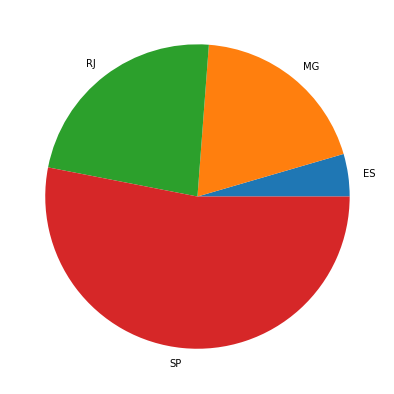

In [151]:
sudeste2020=RegioesBrasil2020[RegioesBrasil2020['regiao']=="Sudeste"]
sudeste2021=RegioesBrasil2021[RegioesBrasil2021['regiao']=="Sudeste"]
sudeste2022=RegioesBrasil2022[RegioesBrasil2022['regiao']=="Sudeste"]
data = pd.concat([sudeste2020,sudeste2021,sudeste2022])
data=data.groupby('estado').sum()
fig=plt.figure(figsize=(10,7))
plt.pie(labels=data.index,x=data['obitosNovos'])
plt.show()

A partir do gráfico de pizza acima podemos perceber que o estado de São Paulo é repsonsável por mais de 50% dos óbitos por covid da região sudeste. Depois de SP, o Rio de Janeiro possui maior quantidade de mortes, seguido de Minas gerais e Espírito Santo. Além disso, o ES possui uma quantidade muito baixa de óbitos comparado aos outros estados da região sudeste.